In [1]:
import pandas as pd
import seaborn as sns
import os

In [14]:
df=pd.read_csv("dataset - netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [15]:
#Deleting the duplicate datasets.
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<Axes: ylabel='release_year'>

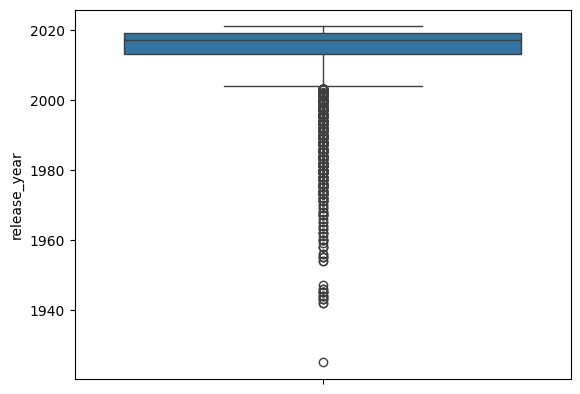

In [6]:
#plotting graph for the column 'release_year'.
sns.boxplot(df["release_year"])

In [9]:
#z-score method to find limits.
#upper limit=ul
#lower limit=ll
ul=df["release_year"].mean()+3*df["release_year"].std()
ll=df["release_year"].mean()-3*df["release_year"].std()
print("UPPER LIMIT:",ul)
print("LOWERLIMIT:",ll)

UPPER LIMIT: 2040.6595607699119
LOWERLIMIT: 1987.7067645998263


In [19]:
#find the outliers.
df.loc[(df['release_year'] > ul) | (df['release_year'] < ll)]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
60,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
61,s43,Movie,Jaws 2,Jeannot Szwarc,United States,9/16/2021,1978,PG,116 min,"Dramas, Horror Movies, Thrillers"
62,s44,Movie,Jaws 3,Joe Alves,United States,9/16/2021,1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers"
63,s45,Movie,Jaws: The Revenge,Joseph Sargent,United States,9/16/2021,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers"
182,s132,Movie,Blade Runner: The Final Cut,Ridley Scott,United States,9/1/2021,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies"
...,...,...,...,...,...,...,...,...,...,...
8649,s7879,TV Show,Robotech,Not Given,United States,10/1/2016,1985,TV-MA,1 Season,Anime Series
8661,s7994,TV Show,Shaka Zulu,Not Given,Italy,1/10/2019,1986,TV-14,1 Season,TV Dramas
8697,s8190,TV Show,The Andy Griffith Show,Not Given,United States,7/1/2017,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies"
8702,s8232,Movie,The Bund,Not Given,Hong Kong,9/20/2018,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"


In [33]:
#deleting the outliers with trimming.
new_df=df.loc[(df['release_year'] < ul) & (df['release_year'] > ll)]
print("Before removing outliers:",len(df))
print("After removing outliers:",len(new_df))

Before removing outliers: 8790
After removing outliers: 8573


<Axes: ylabel='release_year'>

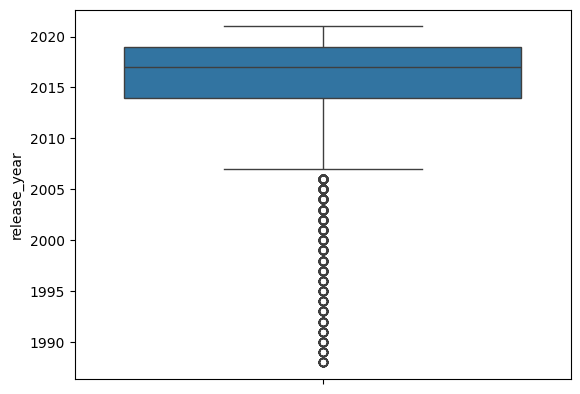

In [34]:
#plotting the boxplot after removing outliers.
sns.boxplot(new_df['release_year'])

In [35]:
new_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
